# Barcharts and Histograms
## Aggregate data;
 - Barchart - 2D data
 - Histograms - 1D data

In [1]:
def summary():
    """
    Both use vertical bars;
    Aggregate data
    :returns: barchart or histogram
    """
    pass

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
%matplotlib inline

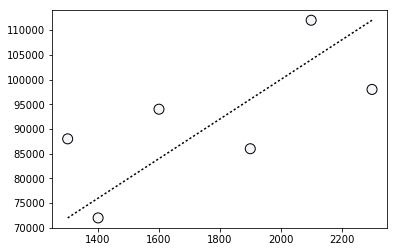

In [4]:
s_v_c = pd.DataFrame({'house_size':pd.Series((13, 14, 16, 19, 21, 23))*100,
                    'cost':pd.Series((88,72,94,86,112,98))*1000})
def scatter_plot(svc=None, highlight_size=2400):
    """
    Graphs sizes horizontally
    And costs vertically
    http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
    Cannot use pandas native .plot method, does not handle color keyword arg?
    """
    svc = s_v_c if svc is None else svc
    color =  (svc.house_size==highlight_size)*1
    size = [100]*len(svc)
    kind='scatter'
    cmap='PuRd'
    plt.scatter(svc.house_size, svc.cost, c=color, s=size, cmap=cmap, edgecolor='black')
    #svc.plot('size', 'cost', c=color, s=[100]*len(size_v_cost), kind='scatter', cmap='PuRd')

def checking_linearity(svc=None):
    """
    When a line governs the relationship of two datapoints; 
    the data is called 'linear'
    Linearity is a rare occurrence in statistics
    """
    
    svc = size_v_cost_changed if svc is None else svc
    scatter_plot(svc)
    #print(plt.ylim())
    #plt.ylim(min(svc.cost), max(svc.cost))
    plt.plot([min(svc.house_size), max(svc.house_size)], [min(svc.cost), max(svc.cost)], color='black', ls='dotted')#vlines
    
checking_linearity(s_v_c)

In [5]:
checking_linearity_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48702501/m-48724214'

In [6]:
def interpolation(svc=None, n=0):
    """
    :param n: The size for which to return expected cost
    :returns : How much to pay for an 'n' sq ft house
    """
    svc=svc.append(pd.DataFrame({'house_size':(n,)}), True)
    ordered = pd.Series(index=svc.house_size, data=svc.cost.values).sort_index()
    #Must sort by size; (even though it appears to be the independent variable) 
    #some w/ more size still cost less; 
    
    print(ordered)
    return (ordered #Orders by the index, which is size in sq ft; interpolation depends on order (see OP)
    .interpolate(method='index')[n]) #Interpolate using method 'index'

In [7]:
interpolation(s_v_c, 2200)


house_size
1300     88000.0
1400     72000.0
1600     94000.0
1900     86000.0
2100    112000.0
2200         NaN
2300     98000.0
dtype: float64


105000.0

In [8]:
def interpolation(svc=None, num=2200):
    """
    :returns: expected value based on closest two bounding points
    """
    
    svc = s_v_c if svc is None else svc
    svc_series = pd.Series(index=svc.house_size, data=svc.cost.values)
    return (s_v_c.cost[s_v_c.house_size<num].max() + s_v_c.cost[s_v_c.house_size>num].min())/2

In [9]:
interpolation_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48532779/m-48480448'
assert interpolation()==105000, 'The answer is the average of the cost of homes sized 2100 and 2300'

In [10]:
def trust():
    svc = s_v_c.copy()
    svc = svc.append(pd.DataFrame({'size':(2200,),'cost':(105000,)}), True)
    #print(svc)
    scatter_plot(svc, 2200)
    return False
    

'Not a lot of trust in this number...'

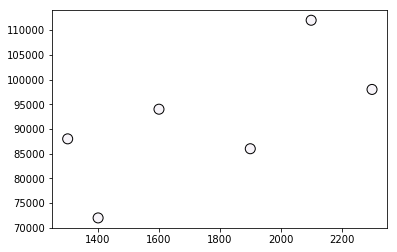

In [11]:
trust()
'Not a lot of trust in this number...'

In [12]:
trust_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48728368/m-48439340'

 - Likelihood that a squiggly line predicts these points?
 - More likely that a linear line predicts them and the distance from this line is called "noise"

*Bars help smooth out differences*

All the data falling between two points on x-axis can be summarized by a single point on y-axis 


In [13]:
def grouping_data(svc=None, s=1000, e=1500):
    
    svc = s_v_c if svc is None else svc
    return s_v_c.cost[(s_v_c.house_size>=s) & (s_v_c.house_size<=e)].mean()

In [14]:
assert grouping_data()== 80000, "Answer is halfway point between 88K and 72K"

In [15]:
grouping_data_solution='https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48747152/m-48729153'

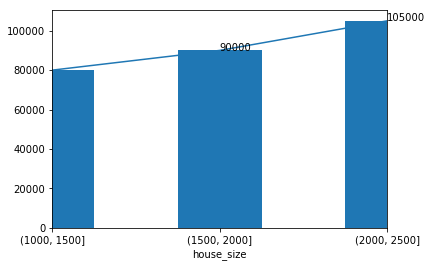

In [36]:
def grouping_data_2_and_grouping_data_3():
    # df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()
    # https://stackoverflow.com/a/21441621/1175496
    # https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe
    mean_cost = s_v_c.groupby(pd.cut(s_v_c.house_size, np.arange(1000,2501,500))).mean().cost
    mean_cost.plot(kind='bar')
    s_v_c.groupby(pd.cut(s_v_c.house_size, np.arange(1000,2501,500))).mean().cost.plot(kind='line')
    #print(mean_cost)
    middle_bar=mean_cost.iloc[1]
    top_bar = mean_cost.iloc[-1]
    
    #middle_index=mean_cost.index[1]
    #print(middle_bar)
    #x is just index 0, 1, 2, when using a bar chart.
    plt.annotate(middle_bar, xy = (1, middle_bar), xytext = (0, 0), textcoords = 'offset points')
    plt.annotate(top_bar, xy = (len(mean_cost)-1, top_bar), xytext = (0, 0), textcoords = 'offset points')
grouping_data_2_and_grouping_data_3()

In [27]:
np.arange(1000,2501,500)

array([1000, 1500, 2000, 2500])

In [28]:
df["B"]

NameError: name 'df' is not defined

In [30]:
def grouping_data_2(svc=None, s=1500, e=2000):
    return (grouping_data(svc, s, e))
#NameError: name 'df' is not defined
#df.groupby(pd.cut(df["B"], np.arange(0, 1.0+0.155, 0.155))).sum()

In [31]:
assert grouping_data_2()==90000, "Answer is halfway point between 86K and 94K"

In [32]:
grouping_data_2_solution='https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48717440/m-48680614'

In [88]:
def grouping_data_3(svc=None, s=2000, e=2500):
    return grouping_data(svc, s, e)

In [90]:
assert grouping_data_3()==105000, 'Answer is halfway between 86 and 112K'
grouping_data_3_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48532781/m-48695529'

In [91]:
def bar_charts():
    """
    :returns: if bar charts are cool
    """
    return True
assert bar_charts(), 'Bar charts are cool according to Sebastian'
bar_charts_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48727695/m-48701367'

In [41]:
income = pd.Series((132754, 
                    137192,
                    122177,
                    147121,
                    143000,
                    126010,
                    129200,
                    124312,
                    128132))

In [42]:
list(range(125,150,5))

[125, 130, 135, 140, 145]

In [43]:
income.sort_values()

2    122177
7    124312
5    126010
8    128132
6    129200
0    132754
1    137192
4    143000
3    147121
dtype: int64

In [73]:
#income.hist()
#income.hist(bins=len(range(125,150,5)))
#income.hist(bins=3)
def histograms(bin=0):
    """
    :returns : Value of frequency of the first bin
    """
    income_hist = plt.hist(income.data,bins=pd.Series([120,130,140,150])*1000)
    assert np.allclose(income_hist[0],np.array((5.,2.,2.))) #The values in each bin; len == n
    assert np.allclose(income_hist[1], np.array((120000, 130000, 140000, 150000))) #The bin boundaries; lin == (n+1)
    #Inspecting Patch
    #<a list of 3 Patch objects>
    print(income_hist[2][0])
    #Patch objects are objects in pyplot ; for example, a Rectangle(120000,0;10000x5)
    return income_hist[0][bin]

Rectangle(120000,0;10000x5)


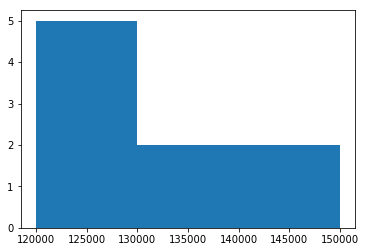

In [74]:
assert histograms()==5., 'The number of incomes falling in the first bin, 120K to 130K, should be 5, not {}'.format(histograms())
histograms_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48648858/m-48709161'

In [75]:
def histograms_2(bin=1):
    return histograms(1)

Rectangle(120000,0;10000x5)


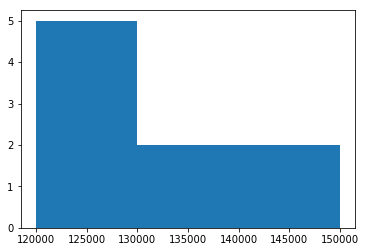

In [76]:
assert histograms_2()==2., 'The second bin has frequency of 2 incomes (between 130K and 140K)'

In [77]:
histograms_2_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48702503/m-48688776'

In [78]:
ages = pd.Series((21, 17, 9, 27, 39, 4, 32, 12, 14, 12, 38, 9, 19, 22, 14, 21, 3, 31, 8, 15, 33, 29))

In [79]:
ages.sort_values()

16     3
5      4
18     8
2      9
11     9
7     12
9     12
8     14
14    14
19    15
1     17
12    19
0     21
15    21
13    22
3     27
21    29
17    31
6     32
20    33
10    38
4     39
dtype: int64

In [80]:
def age_distribution():
    dist = plt.hist(ages,bins=[0,10, 20, 30, 40])
    return dist[0]

In [86]:
ages.groupby(list(range(0,50,10)))

ValueError: Grouper for '<class 'numpy.int64'>' not 1-dimensional

In [88]:
de fage_distribution
ages.groupby(pd.cut(ages, np.arange(0,41,10))).count()

(0, 10]     5
(10, 20]    7
(20, 30]    5
(30, 40]    5
dtype: int64

In [84]:
range(0,10)

range(0, 10)

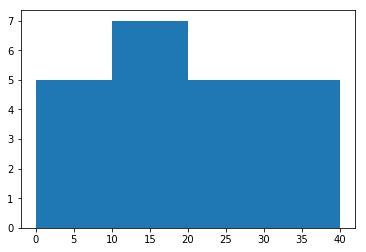

In [71]:
assert np.allclose(age_distribution(), np.array((5.,7.,5.,5.))), 'Distribution should be 5, 7, 5, 5'
age_distribution_solution = 'https://www.udacity.com/course/viewer#!/c-st101/l-48727696/e-48532782/m-48688775'

In [132]:
def summary():
    """
    :returns: Summary of this lesson
    """
    return 'Histogram is 1D data, Bar chart is 2D data, both group datapoints. '\
+ 'Histograms group by  frequencies in a bin, bar charts by averages of the bin'

In [133]:
print(summary())

Histogram is 1D data, Bar chart is 2D data, both group datapoints. Histograms group by  frequencies in a bin, bar charts by averages of the bin
